# 05_데이터 정제

데이터 정제란 데이터 분석에 앞서 전처리가 완료된 데이터에 대해 **빈값(결측치)**이나 **정상 범위를 벗어난 값(이상치)** 들을 제거하거나 다른 값으로 대체하는 처리를 말합니다.

## #01.결측치

> 비어있는 값 (DB에서의 NULL 과 비슷한 의미)

현장에서 만들어진 실제 데이터의 수집 과정에서 발생한 오류로 인해 결측치를 포함하고 있는 경우가 많다.

결측치가 있으면 통계 처리 함수가 적용되지 않거나 분석 결과가 왜곡되는 문제가 발생한다.

### 1) 결측치를 처리하는 대표적인 방법

1. 결측치 소거법
    - 결측치가 포함된 행 혹은 열을 제거하는 방법
    - 결측치가 포함된 데이터가 적은 경우는 상관없지만 결측치가 많을 경우 결과 왜곡이 발생할 수 있다.
1. 결측치 대체법
    - 결측치에 대표값이나 기술통계값을 적용하는 방법
    
### 2) 필요한 기본 패키지와 샘플 데이터 준비

#### a) 패키지 가져오기

In [21]:
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot  
from pandas import merge
from sklearn.impute import SimpleImputer # 통계기반 결측치 정제를 위한 클래스 (오류발생시 pip install --upgrade sklearn 실행)
import numpy

In [23]:
성적표csv = read_csv("http://itpaper.co.kr/demo/py/grade.csv", encoding="euc-kr")
성적표csv

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


### 데이터 전처리 

#### a) 인덱스 생성하기 

In [24]:
현재인덱스 = list(성적표csv.index)
이름 = list(성적표csv['이름'])

indexDict = {}
for i, v in enumerate(이름):
    # `이름`의 i번째에 대응되는 항목을 `현재인덱스`에서 가져옴
    before = 현재인덱스[i];
    indexDict[before] = v
    
성적표 = 성적표csv.rename(index=indexDict)
성적표.drop('이름', axis=1, inplace=True)
성적표

,학년,성별,국어,영어,수학,과학
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


## #02. 결측치 확인하기

### 1) 각 데이터의 결측치 여부 확인

- 각 열에 대해 결측치가 아닐 경우 False, 결측치는 True로 표시됨
- `isnull()` 함수도 같은 기능

In [25]:
결측치여부 = 성적표.isna()
결측치여부

,학년,성별,국어,영어,수학,과학
철수,False,False,False,True,False,False
영희,False,False,False,False,False,False
민수,False,False,False,False,True,True
수현,False,False,False,False,False,False
호영,False,False,False,False,True,False


### 2) 각 열별로 결측치 수 파악하기

- `inna()`함수나 `isnull()`로 도출된 데이터프레임의 열별로 합계를 수행하면 `True`는 1, `False`는 0 으로 계산된다.

In [5]:
결측치합계 = 결측치여부.sum()
결측치합계

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

## #03. 결측치 소거

### 1) 결측치가 포함된 모든 행 삭제
- 원본은 변화없음, 삭제 결과가 리턴됨
- `inplace=True` 파라미터를 적용할 경우 리턴값 없이 원본에 즉시 반영됨

#### 행에 포함된 값 중 하나라도 결측치인 경우 삭제

In [6]:
na1 = 성적표.dropna()
na1

,학년,성별,국어,영어,수학,과학
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


#### 특정 컬럼에 대한 결측치만 제거하기 

`dropna()`은 간단한 장점이 있지만 자칫 분석에 필요한 행까지 손실될 우려가 있다.

예를 들어 분석 목적이 성별에 따른 수학점수 차이를 알아보는 것이라면 `dropna()`을 사용했을 때, 
국어점수에 결측치가 포함된 철수의 데이터도 삭제 된다.

철수는 수학에 대한 결측치가 아니므로 분석이 가능함에도 불구하고 일괄 삭제 기능으로 제거되는 것이다.

`subset` 파라미터에 정제를 적용할 컬럼이름 리스트 형태로 나열 시  원하는 컬럼에 대해서만 적용할 수 있다.

In [7]:
na2 = 성적표.dropna(subset=['수학'])
na2

,학년,성별,국어,영어,수학,과학
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [8]:
na2_1 = 성적표.dropna(subset=['수학','영어'])
na2_1

,학년,성별,국어,영어,수학,과학
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


#### 행에 포함된 모든 값이 결측치인 경우 삭제

##### 삭제될 가능성이 매우 적다

In [9]:
na2 = 성적표.dropna(how='all')
na2

,학년,성별,국어,영어,수학,과학
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


### 2) 결측치가 포함된 모든 열 삭제

#### 열에 포함된 값 중 하나라도 결측치인 경우 삭제

`axis=1` 파라미터는 y축(컬럼)에 대해 적용된다.

In [10]:
na3 = 성적표.dropna(axis=1)
na3

,학년,성별,국어
철수,1,남자,98
영희,2,여자,88
민수,1,남자,92
수현,3,여자,63
호영,4,남자,120


#### 열에 포함된 모든 값이 결측치인 경우 삭제

In [11]:
na4 = 성적표.dropna(how='all', axis=1)
na4

,학년,성별,국어,영어,수학,과학
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


## #04. 결측치 대체

### 1) 대표값으로 대체하기 

- 원본은 변화 없음, 대체결과 리턴됨
- `inplace=True` 파라미터를 적용할 경우 리턴값 없이 원본에 즉시 반영됨

In [12]:
대표값_대체 = 성적표.fillna(value=50)
대표값_대체

,학년,성별,국어,영어,수학,과학
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


### 2) 통계분석 기법으로 대체하기

#### 결측치를 정제할 규칙 정의

strategy 옵션 : mean=평균, median=중앙값, most_frequent:최빈값(가장 많이 관측되는 수)

In [13]:
# 각 열 단위로 평균(strategy='mean')을 결측치(missing_values)에 지정
정제규칙 = SimpleImputer(missing_values = numpy.nan, strategy='mean')
정제규칙

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

#### 결측치가 정재해야 하는 컬럼만 추출

##### 숫자형식이 아닌 컬럼은 `mean`이나 `median`을 사용할 수 없다.

In [14]:
정제대상 = 성적표.filter(['국어', '수학', '영어', '과학'])
정제대상

,국어,수학,영어,과학
철수,98,88.0,NaN,64.0
영희,88,62.0,90.0,72.0
민수,92,NaN,70.0,NaN
수현,63,31.0,60.0,70.0
호영,120,NaN,50.0,88.0


#### 정의된 규칙을 데이터프레임의 값들만 추출해서 적용

규칙이 적용된 2차 배열(numpy)가 반환된다.

In [15]:
정제규칙_적용결과 = 정제규칙.fit_transform(정제대상.values)
print(type(정제규칙_적용결과))
정제규칙_적용결과

<class 'numpy.ndarray'>


array([[ 98.        ,  88.        ,  67.5       ,  64.        ],
       [ 88.        ,  62.        ,  90.        ,  72.        ],
       [ 92.        ,  60.33333333,  70.        ,  73.5       ],
       [ 63.        ,  31.        ,  60.        ,  70.        ],
       [120.        ,  60.33333333,  50.        ,  88.        ]])

####  적용된 규칙으로 새로운 데이터프레임 생성

원본 데이터프레임에서 인덱스 이름과 컬럼 이름을 가져와 적용해 준다.

In [16]:
결측치정제 = DataFrame(정제규칙_적용결과,
                         index=성적표.index,
                         columns=['국어','수학','영어','과학'])

결측치정제

,국어,수학,영어,과학
철수,98.0,88.000000,67.5,64.0
영희,88.0,62.000000,90.0,72.0
민수,92.0,60.333333,70.0,73.5
수현,63.0,31.000000,60.0,70.0
호영,120.0,60.333333,50.0,88.0


#### 정제과정에서 제외된 컬럼과 병합

제외된 컬럼만 추출하기 

In [17]:
tmp = 성적표.filter(['학년','성별'])
tmp

,학년,성별
철수,1,남자
영희,2,여자
민수,1,남자
수현,3,여자
호영,4,남자


#### 추출된 컬럼과 정제결과를 병합하기

In [19]:
결측치완료 = merge(tmp, 결측치정제, left_index=True, right_index=True)
결측치완료

,학년,성별,국어,수학,영어,과학
철수,1,남자,98.0,88.000000,67.5,64.0
영희,2,여자,88.0,62.000000,90.0,72.0
민수,1,남자,92.0,60.333333,70.0,73.5
수현,3,여자,63.0,31.000000,60.0,70.0
호영,4,남자,120.0,60.333333,50.0,88.0


## #05. 이상치(극단치) 정제

정상적인 범위를 벗어난 극단적으로 크거난 작은 값.

실제로 존재하는 값일 수도 있지만 데이터 측정 과정에서의 오류로 인해 발생하기도 하므로 이상치를 삭제하거나
정상범위의 값으로 대체한 후 데이터 분석을 진행해야 한다.

이상치(극단치) 제거를 위해 먼저 어디까지를 정상 범위로 볼 것인가를 정해야 한다.

1. **논리적으로 판단하여 정하기**
    * 예를 들어 성인의 몸무게가 40-150Kg를 벗어나는 경우는 상당히 드물 것으로 판단하고 이 범위를 벗어나면 극단치로 간주하는 것이다.
    * 데이터 분석가의 주관에 따른다.
1. **통계적인 기준을 이용하기**
    * 상하위 0.3% 또는 +-3 표준편차에 해당할 만큼 극단적으로 크거나 작은면 극단치로 간주하는 방법
    
### 1) 이상치 존재 여부 확인하기를 위해 상자그림 표시

이상치를 원으로 표현하기 때문에 한 눈에 확인 할 수 있다.

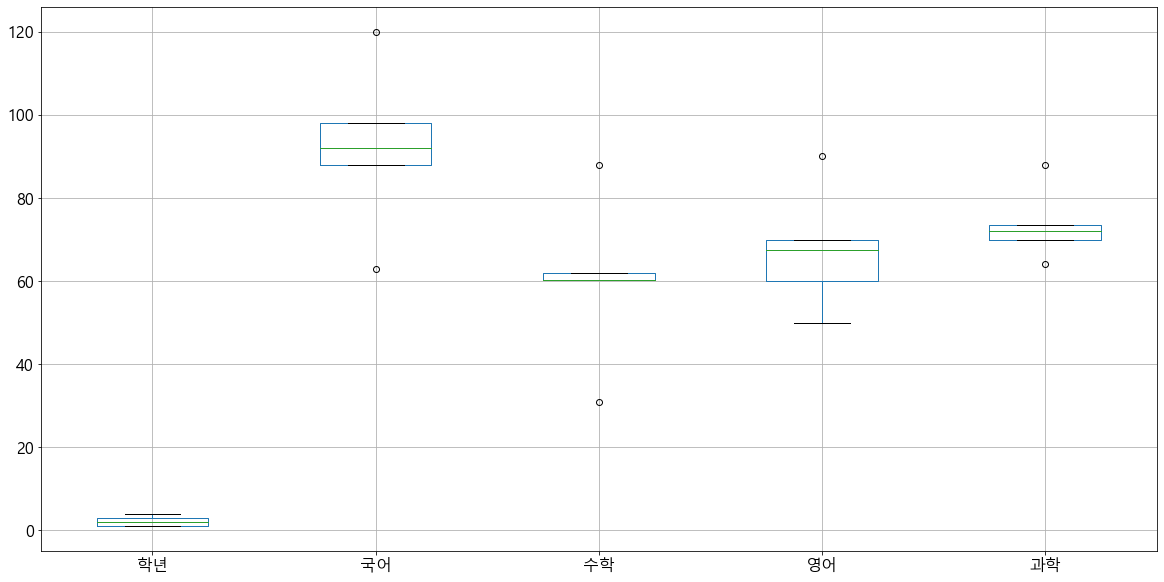

In [27]:
# 앞에 1차적으로 정제한 결과를 활용해서 진행
pyplot.rcParams["font.family"]='Malgun Gothic'
pyplot.rcParams["font.size"]=16
pyplot.rcParams["figure.figsize"]=(20,10)
결측치완료.boxplot()
pyplot.show()

### 2) 이상치를 결측치로 변경하기

#### 국어점수에 대한 이상치 필터링

In [28]:
이상치데이터 = 결측치완료.query('국어>100')
이상치데이터

,학년,성별,국어,수학,영어,과학
호영,4,남자,120.0,60.333333,50.0,88.0


#### 필터링 된 이상치 데이터에 대한 인덱스 추출

In [29]:
이상치인덱스 = list(이상치데이터.index)
이상치인덱스

['호영']

#### 이상치를 갖는 인덱스에 대한 국어점수를 결측치로 변경

In [30]:
for i in 이상치인덱스:
    결측치완료.loc[i,'국어'] =  numpy.nan
    
결측치완료    

,학년,성별,국어,수학,영어,과학
철수,1,남자,98.0,88.000000,67.5,64.0
영희,2,여자,88.0,62.000000,90.0,72.0
민수,1,남자,92.0,60.333333,70.0,73.5
수현,3,여자,63.0,31.000000,60.0,70.0
호영,4,남자,NaN,60.333333,50.0,88.0


### 3) 변경된 결측치 정제

#### 결측치를 정제할 규칙 정의

In [31]:
# 결측치에 대해 평균점수 부여
정제규칙 = SimpleImputer(missing_values=numpy.nan, strategy='mean')

#### 결측치를 정제해야 하는 컬럼만 추출

숫자형식이 아닌 컬럼은 `mean`이나  `median`를 사용할 수 없다.

In [32]:
정제대상 = 결측치완료.filter(['국어','수학','영어','과학'])
정제대상

,국어,수학,영어,과학
철수,98.0,88.000000,67.5,64.0
영희,88.0,62.000000,90.0,72.0
민수,92.0,60.333333,70.0,73.5
수현,63.0,31.000000,60.0,70.0
호영,NaN,60.333333,50.0,88.0


#### dataframe의 값에 대해 규칙 적용

In [33]:
정제규칙_적용결과 = 정제규칙.fit_transform(정제대상.values)
print(type(정제규칙_적용결과))
정제규칙_적용결과

<class 'numpy.ndarray'>


array([[98.        , 88.        , 67.5       , 64.        ],
       [88.        , 62.        , 90.        , 72.        ],
       [92.        , 60.33333333, 70.        , 73.5       ],
       [63.        , 31.        , 60.        , 70.        ],
       [85.25      , 60.33333333, 50.        , 88.        ]])

#### 적용된 규칙으로 새로운 데이터 프레임 생성
원본 데이터 프레임에서 인덱스 이름과 컬럼 이름을 가져와 적용해 준다.

In [34]:
이상치정제 =  DataFrame(정제규칙_적용결과,
                  index=성적표.index,
                  columns=['국어','수학','영어','과학'])
이상치정제

,국어,수학,영어,과학
철수,98.00,88.000000,67.5,64.0
영희,88.00,62.000000,90.0,72.0
민수,92.00,60.333333,70.0,73.5
수현,63.00,31.000000,60.0,70.0
호영,85.25,60.333333,50.0,88.0


#### 정제과정에서 제외된 컬럼과 병합
제외된 컬럼만 추출

In [35]:
tmp = 성적표.filter(['학년','성별'])
tmp

,학년,성별
철수,1,남자
영희,2,여자
민수,1,남자
수현,3,여자
호영,4,남자


추출된 컬럼과 정제결과를 병합하기 

In [38]:
이상치완료 = merge(tmp, 이상치정제, left_index=True, right_index=True)
이상치완료

,학년,성별,국어,수학,영어,과학
철수,1,남자,98.00,88.000000,67.5,64.0
영희,2,여자,88.00,62.000000,90.0,72.0
민수,1,남자,92.00,60.333333,70.0,73.5
수현,3,여자,63.00,31.000000,60.0,70.0
호영,4,남자,85.25,60.333333,50.0,88.0
